<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
Receives input from the dataset and takes its shape. Ex: Columns of the dataframe, the shape of a picture
### Hidden Layer:
The layers after the input layer. Is hidden because we don't have no control over the inputs and output of such layers
### Output Layer:
Final layer of a NN. Outputs a vector of values that is in a format suitable for the type of problem that is trying to be solved
### Neuron:
Receive inputs and pass on their signal to the next layer if a certain threshold is reached
### Weight:
Can be thought as the strength of the connection between nodes
### Activation Function:
Decides how much signal to pass onto the next layer
### Node Map:
A visual diagram of the NN, showing the path from its inputs to outputs
### Perceptron:
Feed information from the front to the back

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

If we are talking a vanilla network or feed forward network, we input the data into the input. Each node will will have a set of weights, inputs, and bias. Now, assuming we have hidden layers as well, the hidden layer nodes will take the input values, multiple them by a given weight, sum up all of the products, and then pass the final value to the next layer. This process for one node is called the activation function. The activation function determines how much of the signal it should pass on to the next layer. Finally, the output layers will contain a vector of values that mimic that type of data we passed into the neural network in the first place.

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1]
#          'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [2]:
df.shape

(4, 2)

In [3]:
##### Your Code Here #####
import numpy as np

np.random.seed(42)

correct_outputs = [[1],[1],[1],[0]]

In [4]:
def sigmoid(x):
    return 1/ (1+np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

In [5]:
weights = 2 * np.random.random((2,1)) - 1
weights

array([[-0.25091976],
       [ 0.90142861]])

In [10]:
for iteration in range(10000):
    
    weighted_sum = np.dot(df,weights) + 10
    
    activated_output = sigmoid(weighted_sum)
    
    error = correct_outputs - activated_output
    adjustments = error * sigmoid_derivative(weighted_sum)
    
    weights += np.dot(df.T, adjustments) 
    
print('Weights after training')
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-6.66666667]
 [-6.66666667]]
Output after training
[[0.9999546]
 [0.9655548]
 [0.9655548]
 [0.0344452]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [169]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
print(diabetes.shape)
diabetes.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [170]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:]
# Columns names

transformer = Normalizer().fit_transform(diabetes)
# Normalizing diabetes data

diabetes = pd.DataFrame(transformer, columns=feats)
# Overwriting diabetes with normalized data

In [171]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.033552,0.827612,0.402622,0.195719,0.000000,0.187890,0.003506,0.279599,0.005592
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144,0.000000
2,0.040397,0.924085,0.323177,0.000000,0.000000,0.117657,0.003393,0.161589,0.005050
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852,0.000000
4,0.000000,0.596381,0.174126,0.152360,0.731328,0.187620,0.009960,0.143654,0.004353


In [189]:
y = diabetes.iloc[:,8].values
# Target or ['Outcome']

In [191]:
y = np.where(y >= .005, -1, 1)
# Seem to be around .005

In [201]:
y[:5]

array([-1,  1, -1,  1,  1])

In [202]:
X = diabetes.iloc[:,[2,7]].values
X

array([[0.40262215, 0.27959871],
       [0.55598426, 0.26114412],
       [0.32317734, 0.16158867],
       ...,
       [0.38758161, 0.16149234],
       [0.39917472, 0.31268687],
       [0.55401772, 0.18203439]])

In [203]:
##### Update this Class #####

class Perceptron:
    
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter
    
    def fit(self, X, y):

        # Randomly Initialize Weights
        self.weight = np.zeros(1 + X.shape[1])
        
        self.errors = []
        
        for i in range(self.niter):
            # Weighted sum of inputs / weights
            err = 0
            for xi, target in zip(X,y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self
    
    def net_input(self,X):
        return np.dot(X,self.weight[1:]) + self.weight[0]
    
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0, 1,-1)

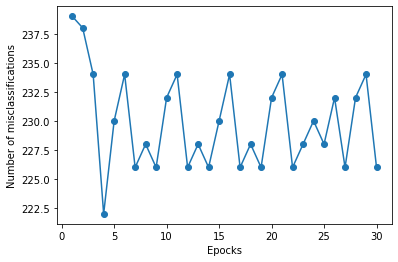

In [204]:
import matplotlib.pyplot as plt
pn = Perceptron(0.1,30)
pn.fit(X,y)
plt.plot(range(1,len(pn.errors) + 1),pn.errors,marker='o')
plt.xlabel("Epocks")
plt.ylabel("Number of misclassifications")
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?